In [2]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [3]:
# Load data
TX_2013_crime = pd.read_csv('C:/Users/keith/Desktop/Thinkful/2013_Texas_crimes.csv',encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [4]:
TX_2013_crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,TEXAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Abernathy,"2,821",0,0,NaN,0,0,0,12,12,0,0,1,NaN


## Data Cleaning

In [5]:
TX_2013_crime = TX_2013_crime.drop('Unnamed: 13',1)

In [6]:
cols = ['City', 'Population', 'Violent_crime', 'Murder_and_nonnegligent_manslaughter', 'Rape1',
 'Rape2', 'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_vehicle_theft',
 'Arson3']

In [7]:
TX_2013_crime.columns = cols
TX_2013_crime = TX_2013_crime.drop(TX_2013_crime.index[0:4]).drop(TX_2013_crime.index[608:]).reset_index(drop=True)

In [8]:
TX_2013_crime.sort_values(by='Population')

,City,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Rape1,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
259,Jamaica Beach,"1,006",0,0,NaN,0,0,0,1,1,0,0,0
392,Omaha,"1,012",3,0,NaN,0,2,1,21,10,10,1,0
233,Hill Country Village,"1,016",0,0,NaN,0,0,0,41,6,32,3,0
452,Riesel,"1,018",4,0,NaN,0,0,4,10,1,9,0,0
195,Godley,"1,035",2,0,NaN,0,0,2,18,7,11,0,0
600,Wortham,"1,044",1,0,NaN,0,0,1,51,12,37,2,0
260,Jarrell,"1,051",0,0,NaN,0,0,0,11,0,10,1,0
483,Santa Anna,"1,067",4,0,NaN,2,0,2,22,7,14,1,0
197,Gorman,"1,071",3,0,NaN,0,0,3,43,18,23,2,1
565,Waelder,"1,085",0,0,NaN,0,0,0,17,4,13,0,0


In [9]:
a = ['Population', 'Violent_crime',
       'Murder_and_nonnegligent_manslaughter', 'Rape2', 'Robbery',
       'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Motor_vehicle_theft', 'Arson3']
for i in TX_2013_crime[a]:
    TX_2013_crime[i] = TX_2013_crime[i].str.replace(",","")
    TX_2013_crime[i] = pd.to_numeric(TX_2013_crime[i]).dropna()

In [10]:
TX_2013_crime.loc[127,'Arson3'] = 1
TX_2013_crime.loc[93,'Arson3'] = 0

In [11]:
 
TX_2013_crime.Arson3[TX_2013_crime.Arson3.isnull() == True].index.tolist()

[]

In [12]:
TX_2013_crime = TX_2013_crime.drop('Rape1',1)

## Exploratory data analysis

In [13]:
TX_2013_crime.isnull().sum()

City                                     0
Population                               0
Violent_crime                            0
Murder_and_nonnegligent_manslaughter     0
Rape2                                   41
Robbery                                  0
Aggravated_assault                       0
Property_crime                           0
Burglary                                 0
Larceny_theft                            0
Motor_vehicle_theft                      0
Arson3                                   0
dtype: int64

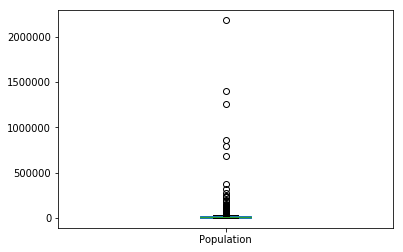

count    6.040000e+02
mean     3.068933e+04
std      1.332682e+05
min      1.680000e+02
25%      2.539000e+03
50%      5.567500e+03
75%      1.613025e+04
max      2.180606e+06
Name: Population, dtype: float64

In [14]:
TX_2013_crime.Population.plot(kind="box")
plt.show()
TX_2013_crime.Population.describe()

In [15]:
# removing outliers

z = []
from scipy import stats
for i in stats.zscore(TX_2013_crime.Population):
    z.append(i)

TX_2013_crime['pop_z_scores'] = z
TX_2013_crime.sort_values(by="Population")
TX_2013_crime = TX_2013_crime.drop(TX_2013_crime.index[[241,475,124,23,175,156]])  
#df.index = pd.RangeIndex(len(df.index))
#df.index = range(len(df.index))

In [16]:
TX_2013_crime.sort_values(by='Population')

,City,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3,pop_z_scores
386,Oak Ridge,168,2,0,0.0,0,2,0,0,0,0,0.0,-0.229212
522,Stagecoach,561,0,0,0.0,0,0,8,8,0,0,0.0,-0.226260
220,Hawley,610,1,0,0.0,0,1,17,9,6,2,0.0,-0.225892
365,Montgomery,670,1,0,0.0,0,1,16,5,10,1,0.0,-0.225442
530,Sunrise Beach Village,692,0,0,0.0,0,0,5,1,4,0,0.0,-0.225276
531,Sunset Valley,696,3,0,0.0,3,0,121,1,120,0,0.0,-0.225246
87,Chillicothe,697,0,0,0.0,0,0,9,3,5,1,1.0,-0.225239
578,Westover Hills,708,0,0,0.0,0,0,17,4,12,1,0.0,-0.225156
285,Kress,721,0,0,0.0,0,0,2,0,2,0,0.0,-0.225059
142,Driscoll,751,1,0,0.0,0,1,3,2,1,0,0.0,-0.224833


In [17]:
TX_2013_crime[a].isnull().sum()

Population                               0
Violent_crime                            0
Murder_and_nonnegligent_manslaughter     0
Rape2                                   40
Robbery                                  0
Aggravated_assault                       0
Property_crime                           0
Burglary                                 0
Larceny_theft                            0
Motor_vehicle_theft                      0
Arson3                                   0
dtype: int64

In [18]:
a = ['Population', 'Violent_crime',
       'Murder_and_nonnegligent_manslaughter', 'Robbery',
       'Aggravated_assault', 'Property_crime', 'Burglary', 'Larceny_theft',
       'Motor_vehicle_theft', 'Arson3']

In [19]:
data = TX_2013_crime[a]

In [20]:
from mlxtend.preprocessing import standardize
TX_2013_crimess= standardize(data, columns=a)
TX_2013_crimess.describe()

,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
count,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02
mean,-2.673447e-17,2.970496e-18,2.079347e-17,1.485248e-17,-2.970496e-18,-1.485248e-17,-2.970496e-17,-2.970496e-18,4.158695e-17,2.970496e-18
std,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00,1.000837e+00
min,-4.729464e-01,-3.466150e-01,-3.318254e-01,-3.023998e-01,-3.423381e-01,-4.076487e-01,-4.051110e-01,-4.055200e-01,-3.528402e-01,-3.330049e-01
25%,-4.136103e-01,-3.246235e-01,-3.318254e-01,-3.023998e-01,-3.180585e-01,-3.782441e-01,-3.657661e-01,-3.813226e-01,-3.424462e-01,-3.330049e-01
50%,-3.413030e-01,-2.806404e-01,-3.318254e-01,-2.594257e-01,-2.775923e-01,-3.174301e-01,-3.051094e-01,-3.194848e-01,-3.008701e-01,-3.330049e-01
75%,-8.208702e-02,-1.047081e-01,-3.318254e-01,-1.519904e-01,-8.335484e-02,-7.952041e-02,-1.075652e-01,-8.199180e-02,-1.137779e-01,-3.400050e-02
max,9.025774e+00,1.031379e+01,1.049172e+01,1.177333e+01,1.085869e+01,9.616636e+00,1.002457e+01,9.917807e+00,9.417531e+00,1.192617e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207DA3B3CF8>,
      dtype=object)

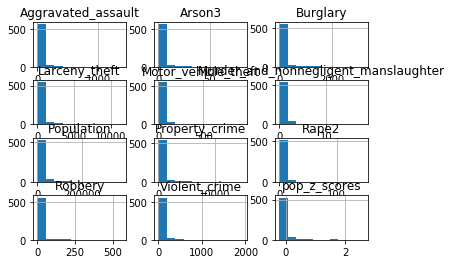

In [30]:
a = TX_2013_crime.select_dtypes(include=['float64','int64'])


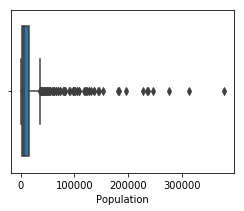

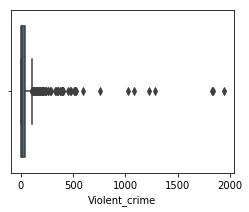

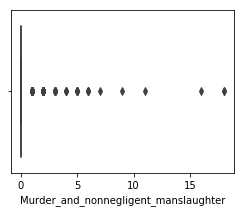

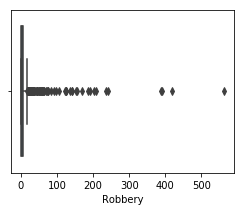

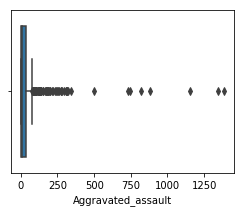

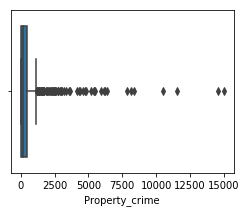

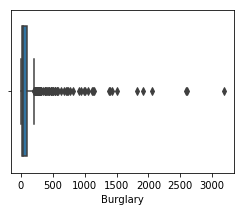

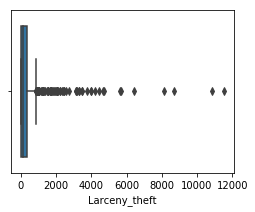

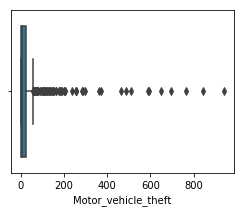

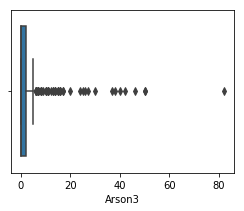

In [22]:
for i in TX_2013_crimess[a]:
    fig, ax = pyplot.subplots(figsize=(4, 3))
    sns.boxplot(  TX_2013_crime[i],ax=ax)

In [ ]:
for i in TX_2013_crime:
    if i == null:
        print

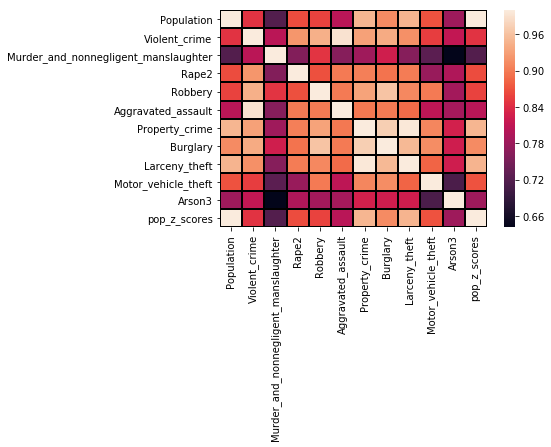

In [317]:
#sns.heatmap(TX_2013_crime.corr(),annot=True)
sns.heatmap(TX_2013_crime.corr(), linewidths=1, linecolor='black')


In [116]:
#Descriptive statistics

TX_2013_crime.describe()

,Population,Violent_crime,Murder_and_nonnegligent_manslaughter,Rape1,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
count,6.040000e+02,604.000000,604.000000,41.000000,563.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,602.000000
mean,3.068933e+04,142.246689,1.395695,36.195122,8.731794,44.995033,85.259934,1158.044702,237.786424,832.149007,88.109272,5.219269
std,1.332682e+05,1025.073557,11.165009,86.663493,47.218100,451.371499,535.144775,6482.389655,1375.147597,4465.894390,699.715579,37.854592
min,1.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.539000e+03,4.000000,0.000000,2.000000,0.000000,0.000000,3.000000,44.000000,12.000000,27.000000,1.750000,0.000000
50%,5.567500e+03,12.000000,0.000000,11.000000,1.000000,2.000000,9.000000,138.500000,31.000000,100.000000,6.000000,0.000000
75%,1.613025e+04,46.250000,1.000000,34.000000,4.000000,7.000000,33.000000,497.500000,92.000000,371.500000,23.000000,2.000000
max,2.180606e+06,20993.000000,214.000000,523.000000,663.000000,9891.000000,10270.000000,110919.000000,23733.000000,73591.000000,13595.000000,708.000000


There may be a few outliers in free_sulfur_dioxide and total_sulfur_dioxide. The standard deviations are high in these features.

In [70]:
print(wine_qual.quality.value_counts())

NameError: name 'wine_qual' is not defined

In [71]:
plt.hist(wine_qual.quality,bins=6)
plt.title("Quality Rank Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

NameError: name 'wine_qual' is not defined

The target variable has 6 classes. 3, 8, and 4 are very imbalanced from 5, 6, and 7 but altogether they are normally distributed. It may effect decision trees.

In [ ]:
 wine_qual['quality']=wine_qual.quality.replace([3,4,5,6,7,8],[0,0,0,1,1,1])

In [ ]:
wine_qual.quality.plot(kind='hist')

In [ ]:
wine_qual.quality.value_counts()

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(wine_qual.drop('quality',1), wine_qual.quality)

print(X_ros.shape[0] - wine_qual.drop('quality',1).shape[0], 'new random picked points')

 
plot_2d_space(X_ros , y_ros , 'Random over-sampling')


In [ ]:
for i in  wine_qual.drop('quality',1):
    fig, ax = pyplot.subplots(figsize=(8, 3))
    sns.boxplot(x='quality', y= i, data=wine_qual,ax=ax)

From the boxplots it seems that higher alcohol and higher citric acid and sulfates have the greatest effect on the best wine and higher PH, density, and volatile acidity, have the greatest effect on the worst wines. The other variables seem to contribute little effect across the scale of wine quality.

In [ ]:
#pair plot 
g = sns.PairGrid(wine_qual , diag_sharey=False) 
g.map_upper(plt.scatter, alpha=.5) 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0)) 
g.map_diag(sns.kdeplot, lw=3)
plt.show()

The pair plot confirms some of the assumptions made from the boxplots.

In [ ]:
# Correleation Matrix

fig, ax = pyplot.subplots(figsize=(10, 7))
sns.heatmap(wine_qual.corr(),annot=True)
plt.show()

# Decision Tree


In [ ]:
# Naive approach

In [ ]:
X = wine_qual.drop('quality',1)
Y = wine_qual['quality']
 

In [ ]:
start_time = time.time() # start timer 

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features= 'sqrt',
                                            max_depth=8, random_state=20,)

decision_tree.fit(X, Y)
print(cross_val_score(decision_tree, X, Y, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer



In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y))) 

In [ ]:
# create new feature based on the ranges of quality to help offset the outliers.

wine_qual['log_free_sulfur_dioxide'] = [math.log(x) for x in wine_qual.free_sulfur_dioxide]
wine_qual['log_total_sulfur_dioxide'] = [math.log(x) for x in wine_qual.total_sulfur_dioxide]

In [ ]:
wine_qual.head(2)

In [ ]:
# Try again

X = wine_qual.drop('quality',1)
Y = wine_qual['quality'] 
 


decision_tree.fit(X, Y)
print(cross_val_score(decision_tree, X, Y, cv=5))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y)))

The model seems to be overfitting

In [ ]:
# Automatic feature selection

import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

In [ ]:
# try oversampling target

ros = RandomOverSampler(random_state=20)
x_train_selected, y_train = ros.fit_sample(x_train_selected, y_train)

In [ ]:
# Find best parameters using GridSearchCV

param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(2,10),max_features=range(1,5))
grid = GridSearchCV(decision_tree, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid.fit(x_train_selected, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Update parameters
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4, max_features=4, 
                                            max_leaf_nodes=9, random_state=20)

decision_tree.fit(x_train_selected, y_train)
print(cross_val_score(decision_tree, x_train_selected, y_train, cv=10))

In [ ]:
print('With 25% Holdout: ' + str(decision_tree.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X_selected, Y).score(X_selected, Y)))


The model doesn't seem to be overfitting as much.

In [ ]:
#confusion matrix 
y_pred = decision_tree.predict(x_test_selected)
confusion_matrix(y_test,y_pred) 

In [ ]:
# Classification report

from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Tree visualization
from IPython.display import Image
import pydotplus
import graphviz
 
#Rendertree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_selected.columns,
    class_names=['0','1'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Trying a similar approach using PCA

In [ ]:
X = wine_qual.drop('quality',1)
Y = wine_qual['quality'] 

In [ ]:
# feature selection first

import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X, Y)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
 
 


In [ ]:
# PCA
pca = PCA(n_components=4)
pca.fit(X_selected)  
pca_data = pca.fit_transform(X_selected)

In [ ]:
start_time = time.time() # start timer 

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features= 'sqrt',
                                            max_depth=8, random_state=20,)

decision_tree.fit(pca_data, Y)
print(cross_val_score(decision_tree, pca_data, Y, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_data, Y).score(pca_data, Y))) 

In [ ]:
# Oversample 

ros = RandomOverSampler()
x_train_selected, y_train = ros.fit_sample(pca_data, Y)

In [ ]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(2,10),max_features=range(1,5))
grid = GridSearchCV(decision_tree, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid.fit(x_train_selected, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_ )

In [ ]:
start_time = time.time() # start timer  

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_features=3, 
                                            max_leaf_nodes=7, random_state=20)

decision_tree.fit(x_train_selected, y_train)
print(cross_val_score(decision_tree, x_train_selected, y_train, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_selected, y_train, test_size=.25, random_state=20) 
    

print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_data, Y).score(pca_data, Y))) 



In [ ]:
#confusion matrix 
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test,y_pred) 

In [ ]:
# Classification report

from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
PCAdf = pd.DataFrame(pca_data)
PCAdf.columns=('PC1','PC2','PC3','PC4')
PCAdf.head()

In [ ]:
# Tree visualization
from IPython.display import Image
import pydotplus
import graphviz
 
#Rendertree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=PCAdf.columns,
    class_names=['0','1'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forrest

In [ ]:
X = wine_qual.drop(['quality'],1) 
Y = wine_qual['quality']

In [ ]:
start_time = time.time() # start timer
rfc = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features='sqrt') 
rfc.fit(X,Y)

print(cross_val_score(rfc, X, Y, cv=5))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

In [ ]:
from sklearn.model_selection import train_test_split
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X, Y))) 

In [ ]:
# Automatic feature selection with SelectKbest

import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

In [ ]:
start_time = time.time() # start timer
rfc = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features='sqrt', ) 
rfc.fit(x_train_selected,y_train)

print(cross_val_score(rfc, x_train_selected, y_train, cv=5))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

In [ ]:
print('With 25% Holdout: ' + str(rfc.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X_selected, Y).score(X_selected, Y)))

In [ ]:
# Oversample
ros = RandomOverSampler(random_state=20)
x_train_selected, y_train = ros.fit_sample(x_train_selected, y_train)

In [ ]:
print('With 25% Holdout: ' + str(rfc.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X_selected, Y).score(X_selected, Y)))
 

In [ ]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(2,10),max_features=range(1,5))
grid = GridSearchCV(rfc, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid.fit(x_train_selected, y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_ )

In [ ]:
start_time = time.time() # start timer
rfc = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features=4, 
                                      max_depth=4,max_leaf_nodes=8) 
rfc.fit(x_train_selected,y_train)

print(cross_val_score(rfc, x_train_selected, y_train, cv=5))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

In [ ]:
print('With 25% Holdout: ' + str(rfc.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X_selected, Y).score(X_selected, Y))) 

In [ ]:
#confusion matrix 
y_pred = rfc.predict(x_test_selected)
confusion_matrix(y_test,y_pred) 

In [ ]:
# Classification report
y_pred = rfc.predict(x_test_selected)
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))